In [1]:
import torch
from matplotlib import pyplot as plt

In [11]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
print(x)

tensor([ 5.,  7., 12., 16., 20.])


In [5]:
learning_rate = torch.tensor(0.001)

In [7]:
class RegressionModel:
    def __init__(self):
        self.w=torch.rand([1], requires_grad=True)
        self.b=torch.rand([1], requires_grad=True)
    def forward(self, x):
        return self.w* x+ self.b
    def update(self):
        self.w-=learning_rate*self.w.grad
        self.b-=learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
    
    

In [9]:
def criterion(yj, y_p):
        return (yj- y_p)**2
model =RegressionModel()
loss_list=[]
for epochs in range(100):
        loss=0.0
        for j in range(len(x)):
                y_p=model.forward(x[j])
                loss+=criterion(y[j],y_p)
        loss=loss/len(x)
        loss_list.append(loss.item())
        loss.backward()
        with torch.no_grad():
                model.update()
        model.reset_grad()
        print("The Parameters are w={}, b-{}, and los={}".format(model.w,model.b, loss.item()))

The Parameters are w=tensor([4.7462], requires_grad=True), b-tensor([1.1054], requires_grad=True), and los=28248.04296875
The Parameters are w=tensor([7.6044], requires_grad=True), b-tensor([1.3053], requires_grad=True), and los=12168.640625
The Parameters are w=tensor([9.4586], requires_grad=True), b-tensor([1.4362], requires_grad=True), and los=5401.1748046875
The Parameters are w=tensor([10.6614], requires_grad=True), b-tensor([1.5223], requires_grad=True), and los=2552.89404296875
The Parameters are w=tensor([11.4416], requires_grad=True), b-tensor([1.5794], requires_grad=True), and los=1354.1094970703125
The Parameters are w=tensor([11.9477], requires_grad=True), b-tensor([1.6176], requires_grad=True), and los=849.5617065429688
The Parameters are w=tensor([12.2760], requires_grad=True), b-tensor([1.6436], requires_grad=True), and los=637.2017211914062
The Parameters are w=tensor([12.4889], requires_grad=True), b-tensor([1.6617], requires_grad=True), and los=547.8172607421875
The P

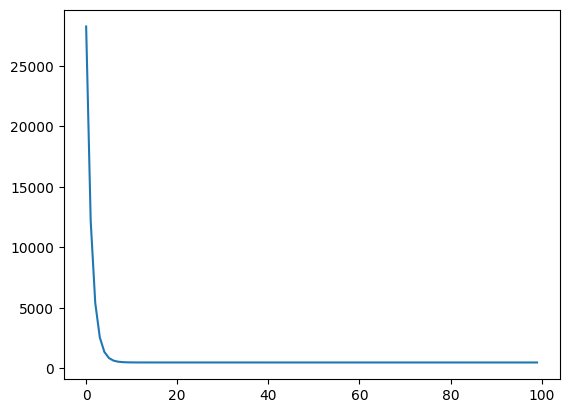

In [10]:
plt.plot(loss_list)
plt.show()